In [77]:
!git clone https://github.com/nikhillinga/Performance_Prediction.git

fatal: destination path 'Performance_Prediction' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving exams.csv to exams (1).csv


In [ ]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
df["average score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

In [ ]:
X = df[["math score", "reading score", "writing score"]]
y = df["average score"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
poly = PolynomialFeatures(degree=0, include_bias=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.0000


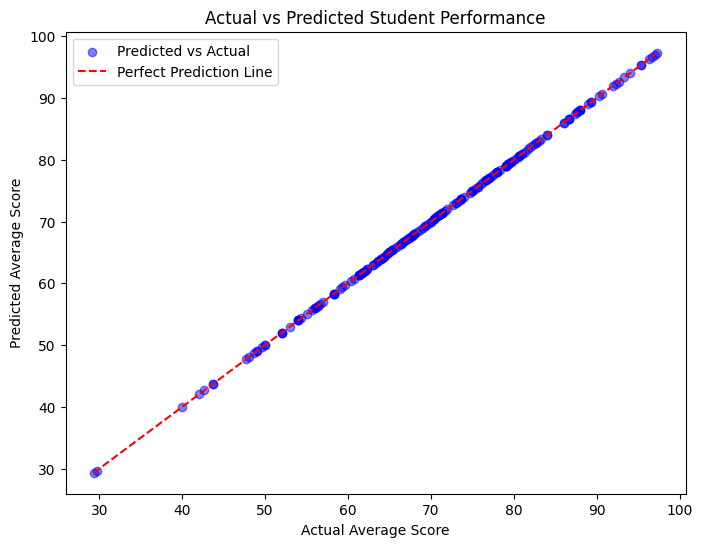

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction Line")

plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Actual vs Predicted Student Performance")
plt.legend()
plt.show()

In [ ]:
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"Training R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")


Training R² Score: 1.0000
Test R² Score: 1.0000


In [ ]:
print(df.select_dtypes(include=[np.number]).corr())

               math score  reading score  writing score  average score
math score       1.000000       0.811767       0.790055       0.916591
reading score    0.811767       1.000000       0.948909       0.968198
writing score    0.790055       0.948909       1.000000       0.961445
average score    0.916591       0.968198       0.961445       1.000000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
import numpy as np

student_data = np.array([[85, 33, 88]])

student_data_scaled = scaler.transform(student_data)
student_data_poly = poly.transform(student_data_scaled)

predicted_score = model.predict(student_data_poly)
print(f"Predicted Average Score: {predicted_score[0]:.2f}")

Predicted Average Score: 68.67


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
